In [1]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

D:\DataScienceAnaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img = load_img('D:/DataScience/train/cats/cat.0.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='D:/DataScience/Preview/New', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

In [5]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [7]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'D:/DataScience/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'D:/DataScience/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 1602 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [8]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save_weights('first_try2.h5')  # always save your weights after training or during training

Epoch 1/5
125/125 [==============================] - 191s 2s/step - loss: 0.7032 - acc: 0.5395 - val_loss: 0.6806 - val_acc: 0.6200
Epoch 2/5
125/125 [==============================] - 181s 1s/step - loss: 0.6736 - acc: 0.6150 - val_loss: 0.6472 - val_acc: 0.6150
Epoch 3/5
125/125 [==============================] - 178s 1s/step - loss: 0.6370 - acc: 0.6580 - val_loss: 0.6403 - val_acc: 0.6425
Epoch 4/5
125/125 [==============================] - 179s 1s/step - loss: 0.6139 - acc: 0.6775 - val_loss: 0.5764 - val_acc: 0.7025
Epoch 5/5
125/125 [==============================] - 180s 1s/step - loss: 0.5888 - acc: 0.7020 - val_loss: 0.5782 - val_acc: 0.6900


In [ ]:
#model.load_weights('first_try.h5')

In [29]:
img = load_img('D:/DataScience/pic5.jpg')  # this is a PIL image
x = img_to_array(img.resize([150,150]))  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)


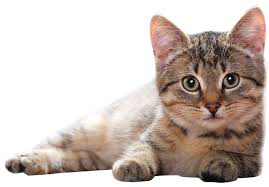

In [30]:
img

In [31]:
if (model.predict_classes(x)==1):
    print ("It is a DOG")
else:
    print ("It is a Cat")



It is a Cat


In [32]:
model.predict_classes(x)

array([[0]])